In [1]:
import sympy
from sympy.solvers import solve
from sympy import Symbol
import numpy as np

set constants

In [2]:
v1 = 5.
v2 = 5.
v3 = 1.
v4 = 1.
Ks = 5.
Ki = 1.
s = 100.

In [3]:
a, b, c = sympy.symbols('a,b,c')
eq1 = sympy.Eq(v1*a/(Ks+a) - v3*b/(Ks+b),0)
eq2 = sympy.Eq(v2*a/(Ks+a) - v4*c/(Ks+c),0)
eq3 = sympy.Eq(s - a - b - c,0)
list = sympy.solve([eq1,eq2,eq3],(a,b,c))
list

[(1.10972742826410, 49.4451362858679, 49.4451362858679),
 (112.640272571736, -6.32013628586795, -6.32013628586795)]

Add inhibition

Solve for a over a domain of i1, i2 values. Plot the list of valeus over i1,i2

In [5]:
triples = []

i1 = 1
while i1 < 6:
    i2 = 1
    while i2 < 6:
        a, b, c = sympy.symbols('a,b,c')
        eq3 = sympy.Eq(s - a - b - c,0)
        eq1 = sympy.Eq(v1*a/((1+i1/Ki)*(Ks+a)) - v3*b/(Ks+b),0)
        eq2 = sympy.Eq(v2*a/((1+i2/Ki)*(Ks+a)) - v4*c/(Ks+c),0)
        try:
            soln = sympy.solve([eq1,eq2,eq3],(a,b,c))
            apossible = [sympy.re(soln[0][0]),sympy.re(soln[1][0])]
            if apossible[0] > 0:
                triples.append((i1,i2,apossible[0]))
            else:
                triples.append((i1,i2,apossible[1]))
        except:
            print('error')
        i2 += 1
    i1 += 1
    
        


error


Text(0.5, 0.92, 'Inhibitor-controlled [A] at steady state')

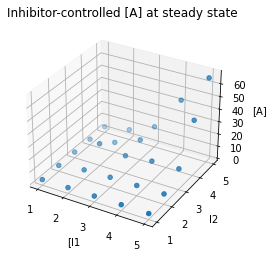

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data=np.array(triples)

x,y,z=data.T
ax.scatter(x,y,z)
ax.set_xlabel('[I1')
ax.set_ylabel('I2')
ax.set_zlabel('[A]')
ax.set_title('Inhibitor-controlled [A] at steady state')

High Ks

In [7]:
Ks = 35

In [8]:
triples = []

i1 = 1
while i1 < 6:
    i2 = 1
    while i2 < 6:
        a, b, c = sympy.symbols('a,b,c')
        eq3 = sympy.Eq(s - a - b - c,0)
        eq1 = sympy.Eq(v1*a/((1+i1/Ki)*(Ks+a)) - v3*b/(Ks+b),0)
        eq2 = sympy.Eq(v2*a/((1+i2/Ki)*(Ks+a)) - v4*c/(Ks+c),0)
        try:
            soln = sympy.solve([eq1,eq2,eq3],(a,b,c))
            apossible = [sympy.re(soln[0][0]),sympy.re(soln[1][0])]
            if apossible[0] > 0:
                triples.append((i1,i2,apossible[0]))
            else:
                triples.append((i1,i2,apossible[1]))
        except:
            print('error')
        i2 += 1
    i1 += 1
    
        

error


Text(0.5, 0.92, 'Inhibitor-controlled [A] at steady state, Ks = 35')

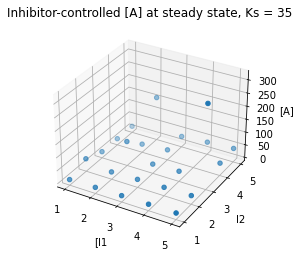

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data=np.array(triples)

x,y,z=data.T
ax.scatter(x,y,z)
ax.set_xlabel('[I1')
ax.set_ylabel('I2')
ax.set_zlabel('[A]')
ax.set_title('Inhibitor-controlled [A] at steady state, Ks = 35')